![Grupo](gru8.jpeg)

# MODELO DE APRENDIZAJE SUPERVISADO

### Objetivo

Predicción de la elección extra de equipaje de aerolíneas British Airways.

***1- Importamos librerías***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

***2- Leemos el Dataset (limpio y con las variables codificadas para el análisis)***

In [2]:
PasajerosAerolineas= pd.read_csv('PasajerosAerolineas_Limpio2.csv')

***3- Revisamos las features del Data set***

In [3]:
PasajerosAerolineas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   NumeroDePasajeros    50002 non-null  int64
 1   CanalDeVenta         50002 non-null  int64
 2   TipoDeViaje          50002 non-null  int64
 3   ClientePotencial     50002 non-null  int64
 4   Estadia              50002 non-null  int64
 5   HorarioDelVuelo      50002 non-null  int64
 6   DiaDelVuelo          50002 non-null  int64
 7   Ruta                 50002 non-null  int64
 8   OrigenReserva        50002 non-null  int64
 9   EquipajeExtra        50002 non-null  int64
 10  AsientosPreferido    50002 non-null  int64
 11  QuiereComidaEnVuelo  50002 non-null  int64
 12  DuracionDelVuelo     50002 non-null  int64
 13  ReservaCompleta      50002 non-null  int64
dtypes: int64(14)
memory usage: 5.3 MB


***4- Modelos Predictivos***

***4.1. Seleccion de target (y) y variables (X)***

In [4]:
X = PasajerosAerolineas.drop(['EquipajeExtra'], axis=1)

* Instancio la variable X2 la cual voy a utilizar en la segunda prueba, previamente realizó un drop de las columnas que no quiero utilizar.

In [5]:
Columnasdrop = (['EquipajeExtra','ReservaCompleta','ClientePotencial','HorarioDelVuelo','HorarioDelVuelo'])

In [6]:
X2 = PasajerosAerolineas.drop(columns=Columnasdrop)

In [7]:
X.shape

(50002, 13)

In [8]:
X2.shape

(50002, 10)

In [9]:
y = PasajerosAerolineas ['EquipajeExtra']

In [10]:
X, y = np.array(X), np.array(y)

In [11]:
X2,y =np.array(X2), np.array(y)

***4.2. Separación de Train / Test***


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

* Separo la variable X2 en train / test

In [13]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2,
                                                    random_state=42)

In [14]:
X_train.shape

(40001, 13)

In [15]:
X_test.shape

(10001, 13)

In [16]:
X2_train.shape

(40001, 10)

In [17]:
X2_test.shape

(10001, 10)

***4.3. Importamos los modelos***

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

***4.4. Importamos las métricas***

In [19]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

***5. Modelo KNN***

En primera instancia se elige como modelo de clasificación KNN (K-Nearest Neighbors) ya que contamos con datos etiquetados y buscamos predecir una variable target.

***5.1. Primera Prueba***

Se busca a través del modelo KNN sin la variable (['EquipajeExtra']) desarrollar la perfomance mas eficiente para desarrollar nuestro algoritmo de maching learning.

In [20]:
knn = KNeighborsClassifier()

* Entrenamos el modelo

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

* Predecimos

In [22]:
predicciones_cla = knn.predict(X_test)

* Graficamos

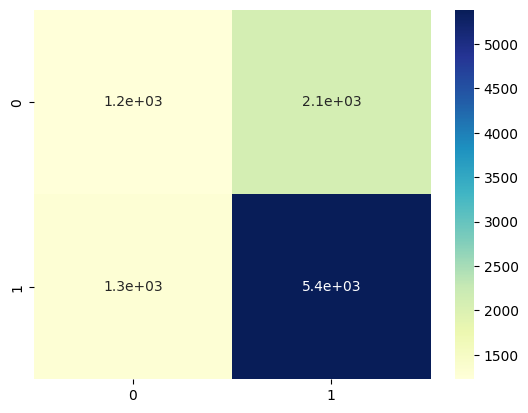

In [23]:
plt.figure()
random_confusion = confusion_matrix(y_test, predicciones_cla)
sns.heatmap(random_confusion, cmap="YlGnBu",annot=True);

* Métricas

Para analizar el rendimiento del modelo se calculan las siguientes métricas: La Accuracy es la proporción de predicciones correctas (verdaderos positivos más verdaderos negativos) en comparación con el total de predicciones. 
La precisión se centra en las predicciones positivas y mide la proporción de verdaderos positivos con respecto al total de predicciones positivas (verdaderos positivos más falsos positivos).
El recall se centra en las instancias positivas y mide la proporción de verdaderos positivos con respecto al total de instancias positivas (verdaderos positivos más falsos negativos). 
El F1 score es la media armónica de precision y recall. 

In [24]:
print(f"Accuracy: {accuracy_score(y_test, predicciones_cla)*100 :.2f}%")
print(f"Precision: {precision_score(y_test, predicciones_cla)*100 :.2f}%")
print(f"Recall: {recall_score(y_test, predicciones_cla)*100 :.2f}%")
print(f"F1 score: {f1_score(y_test, predicciones_cla)*100 :.2f}%")

Accuracy: 66.10%
Precision: 72.04%
Recall: 80.57%
F1 score: 76.07%


Los resultados sugieren que el modelo tiene un rendimiento moderado. La Accuracy es relativamente baja, la precisión del 72.04% indica que cuando el modelo predice la clase positiva, tiene una tasa razonable de aciertos. El recall del 80.57% sugiere que el modelo es efectivo para capturar la mayoría de las instancias positivas en el conjunto de datos. El F1 score del 76.07% proporciona una medida combinada de precisión y recall

***5.2. Segunda Prueba***

Se busca a través del modelo KNN sin las variables (['EquipajeExtra','ReservaCompleta','ClientePotencial','HorarioDelVuelo','HorarioDelVuelo']) desarrollar la perfomance mas eficiente para desarrollar nuestro algoritmo de maching learning. 

In [25]:
knn = KNeighborsClassifier()

* Entrenamos el modelo

In [26]:
knn.fit(X2_train, y_train)

KNeighborsClassifier()

* Predecimos

In [27]:
predicciones_cla2 = knn.predict(X2_test)

* Graficamos


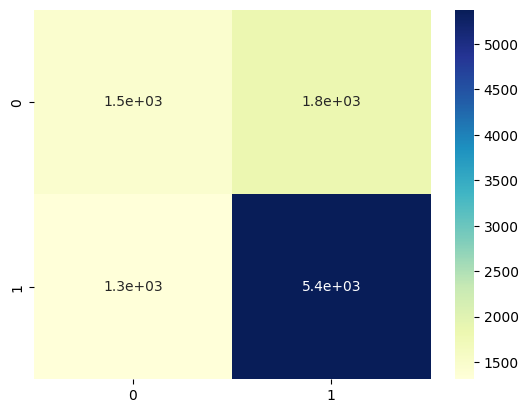

In [28]:
plt.figure()
random_confusion = confusion_matrix(y_test, predicciones_cla2)
sns.heatmap(random_confusion, cmap="YlGnBu",annot=True);

* Métricas

In [29]:
print(f"Accuracy: {accuracy_score(y_test, predicciones_cla2)*100 :.2f}%")
print(f"Precision: {precision_score(y_test, predicciones_cla2)*100 :.2f}%")
print(f"Recall: {recall_score(y_test, predicciones_cla2)*100 :.2f}%")
print(f"F1 score: {f1_score(y_test, predicciones_cla2)*100 :.2f}%")

Accuracy: 68.43%
Precision: 74.43%
Recall: 80.42%
F1 score: 77.31%


En general, estos resultados sugieren un buen rendimiento del modelo. La precisión, el recall y el F1 score son todos relativamente altos, indicando un buen equilibrio entre la capacidad del modelo para predecir correctamente ambas clases.
Aumenta la Accuracy, que es la proporción de predicciones correctas en general.

***6. Optimización de los parámetros del clasificador KNN con Gridsearch***

Se buscan diferentes valores para el número de vecinos (n) y se evalua el rendimiento del modelo KNN en conjuntos de entrenamiento y prueba. Buscamos encontrar el número óptimo de vecinos que maximiza el rendimiento del modelo.

* Target X

In [30]:
ACC_train = []
ACC_test = []

vecinos = [1, 3, 5, 10, 15, 20, 27, 50,55,59,67]
for n in vecinos:

    clf = KNeighborsClassifier(n_neighbors=n)

    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)

    train_acc = accuracy_score(y_train, y_train_pred)
    ACC_train.append(train_acc)

    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    ACC_test.append(test_acc)

El siguiente gráfico nos puede ayudar a identificar si hay un número de vecinos que optimice la presición del modelo. 

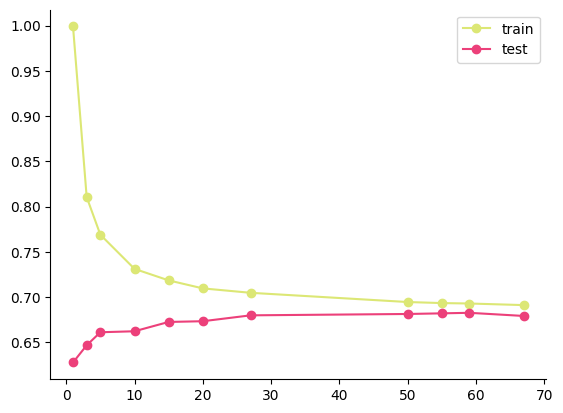

In [31]:
plt.plot(vecinos,ACC_train,'o-',label='train', color='#DCE775')
plt.plot(vecinos,ACC_test,'o-',label='test', color='#EC407A')
plt.legend()
sns.despine();

Muestra cómo varía la Accuracy en los conjuntos de entrenamiento y prueba a medida que cambia el número de vecinos

* Establecemos los parámetros

In [32]:
param_grid_vec = {
    'n_neighbors': [18, 20, 22],
    'weights': ['uniform','distance'],
    'metric': ['euclidean', 'manhattan'],
}

* Entrenamos le modelo

In [33]:
knn_search = KNeighborsClassifier()

In [34]:
vecinos_search = GridSearchCV(estimator=knn_search, param_grid=param_grid_vec,
                         cv=3, verbose=2, n_jobs=-1)

In [35]:
vecinos_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [18, 20, 22],
                         'weights': ['uniform', 'distance']},
             verbose=2)

***6.1.¿Cuál es nuestro mejor estimador?***

Buscamos los mejores parámetros, para buscar el mejor puntaje (best_score_). 
Best_score_ da el mejor rendimiento promedio en términos de la métrica de evaluación especificada durante la validación cruzada.


In [36]:
vecinos_search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')

In [37]:
vecinos_search.best_score_

0.683907920031884

In [38]:
knn_best = vecinos_search.best_estimator_

Evaluamos la precisión de las predicciones en comparación con las etiquetas reales del conjunto de prueba.

In [39]:
knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')

In [40]:
new_predictions = knn_best.predict(X_test)

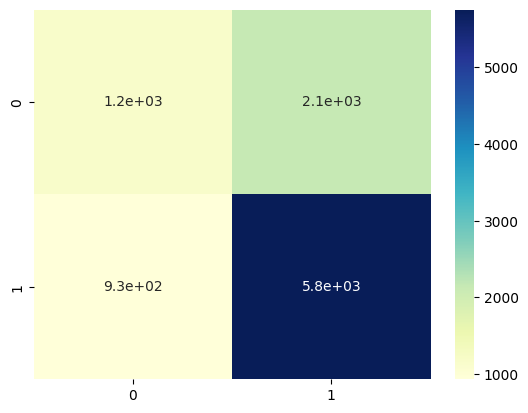

In [41]:
plt.figure()
random_confusion = confusion_matrix(y_test, new_predictions)
sns.heatmap(random_confusion, cmap="YlGnBu",annot=True);

In [42]:
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)*100 :.2f}%")
print(f"Precision: {precision_score(y_test, y_test_pred)*100 :.2f}%")
print(f"Recall: {recall_score(y_test, y_test_pred)*100 :.2f}%")
print(f"F1 score: {f1_score(y_test, y_test_pred)*100 :.2f}%")

Accuracy: 67.90%
Precision: 69.88%
Recall: 91.40%
F1 score: 79.20%


* Con los parametros de la primer target observamos que el modelo performó mejor que la primera prueba, pero aun así no es tan eficiente ya que el accuracy es del 67.9%

***6.2. Ahora vamos a optimizar los parameteros del clasificador kNN para la variable target X2***

In [43]:
ACC2_train = []
ACC2_test = []

vecinos = [1, 3, 5, 10, 15, 20, 27, 50,55,59,67]
for n in vecinos:

    clf2 = KNeighborsClassifier(n_neighbors=n)

    clf2.fit(X2_train, y_train)
    y_train_pred = clf2.predict(X2_train)

    train_acc = accuracy_score(y_train, y_train_pred)
    ACC2_train.append(train_acc)

    y_test_pred = clf2.predict(X2_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    ACC2_test.append(test_acc)

El siguiente gráfico nos puede ayudar a identificar si hay un número de vecinos que optimice la presición del modelo. 

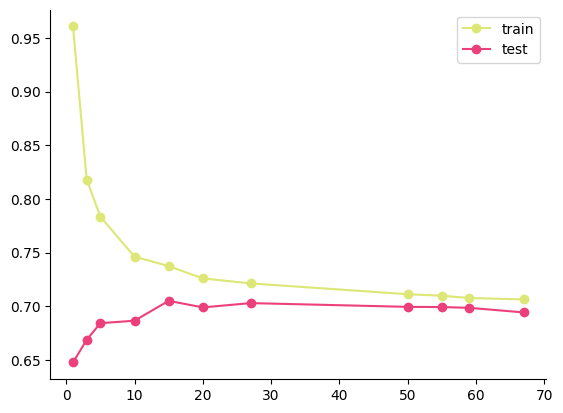

In [44]:
plt.plot(vecinos,ACC2_train,'o-',label='train', color='#DCE775')
plt.plot(vecinos,ACC2_test,'o-',label='test', color='#EC407A')
plt.legend()
sns.despine();

* Establecemos los parámetros.

In [45]:
param_grid_vec = {
    'n_neighbors': [18, 20, 22],
    'weights': ['uniform','distance'],
    'metric': ['euclidean', 'manhattan'],
}

* Entrenamos el modelos

In [46]:
knn_search = KNeighborsClassifier()

In [47]:
vecinos_search2 = GridSearchCV(estimator=knn_search, param_grid=param_grid_vec,
                         cv=3, verbose=2, n_jobs=-1)

In [48]:
vecinos_search2.fit(X2_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [18, 20, 22],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [49]:
vecinos_search2.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=22, weights='distance')

In [50]:
vecinos_search2.best_score_

0.6998575331864921

In [51]:
knn_best2 = vecinos_search2.best_estimator_

* Gráficamos

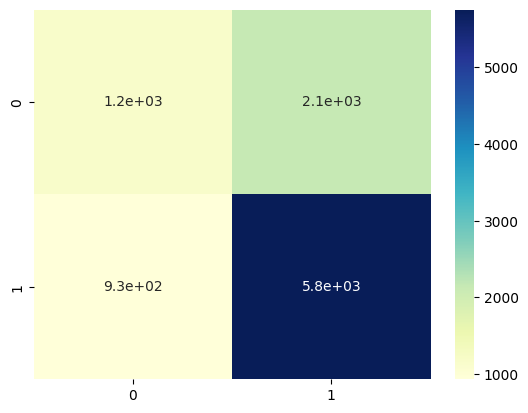

In [52]:
plt.figure()
random_confusion = confusion_matrix(y_test, new_predictions)
sns.heatmap(random_confusion, cmap="YlGnBu",annot=True);

In [53]:
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)*100 :.2f}%")
print(f"Precision: {precision_score(y_test, y_test_pred)*100 :.2f}%")
print(f"Recall: {recall_score(y_test, y_test_pred)*100 :.2f}%")
print(f"F1 score: {f1_score(y_test, y_test_pred)*100 :.2f}%")

Accuracy: 69.43%
Precision: 72.10%
Recall: 88.56%
F1 score: 79.48%


Con los parametros de la segunda target observamos que el modelo performó mejor que con la variable target X, pero aun así no es tan eficiente ya que el accuracy es del 69.43%, el recall disminuyó.

***7. Random Forest***

Probamos un Modelo de Random Forest para clasificar y así poder comparar la performance de los modelos

* Entrenamos el modelo

In [54]:
rf_pa = RandomForestClassifier()

In [55]:
rf_pa.fit(X_train, y_train)

RandomForestClassifier()

* Predecimos

In [56]:
predicciones_pa= rf_pa.predict(X_test)

In [57]:
predicciones_train= rf_pa.predict(X_train)

* Métricas

In [58]:
accuracy = accuracy_score(y_test, predicciones_pa)*100
print(f'{round(accuracy, 2)}%')

72.57%


In [59]:
accuracy = accuracy_score(y_train, predicciones_train)*100
print(f'{round(accuracy, 2)}%')

99.9%


In [60]:
print(f"Accuracy: {accuracy_score(y_test, predicciones_pa)*100 :.2f}%")
print(f"Precision: {precision_score(y_test, predicciones_pa)*100 :.2f}%")
print(f"Recall: {recall_score(y_test, predicciones_pa)*100 :.2f}%")
print(f"F1 score: {f1_score(y_test, predicciones_pa)*100 :.2f}%")

Accuracy: 72.57%
Precision: 76.66%
Recall: 84.81%
F1 score: 80.53%


* Gráficamos

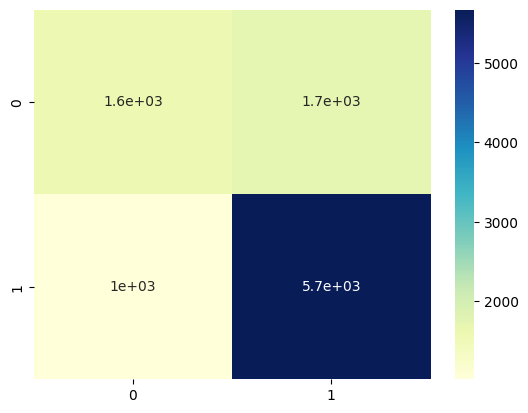

In [61]:
plt.figure()
random_confusion = confusion_matrix(y_test, predicciones_pa)
sns.heatmap(random_confusion, cmap="YlGnBu",annot=True);

El modelo parece tener un rendimiento sólido. La Accuracy del 76.82% sugiere que cuando el modelo predice la clase positiva, tiene una tasa razonable de aciertos. El recall del 85.46% indica que el modelo es efectivo para capturar la mayoría de las instancias positivas en el conjunto de datos. El F1 score del 80.91% proporciona una medida equilibrada entre la precisión y la capacidad del modelo para capturar instancias positivas.

### Conclusión

#####  Con Random Forest observamos que el modelo performó mejor que con KNN. El Accuracy de la prueba es de 73.04%

Por un lado podemos mencionar que el Modelo que mejor performa es el Random Forest, ya que obtiene un Accuracy de 73.04%. Esto representa la proporción de predicciones correctas realizadas por el modelo en relación con el total de predicciones. 
Sin embargo dado que al analizar la correlación entre las variables mencionamos que hay muy baja correlación esto puede afectar el rendimiento del Modelo y por ello podría ser mas eficiente si hubieran features que cumplieran con esa característica. Incluyendo nuevas variables en el Modelo se podria obtener una mejor predicción de la elecciòn de equipaje extra, para lo cual deberíamos solicitar a la Aerolìnea nuevos datos.